# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key= weather_api_key
country=[]
temp=[]
temp_min=[]
temp_max=[]
humidity=[]
cloudiness=[]
windspeed=[]
city_list=[]
long=[]
lat=[]
record=0



base_url = "http://api.openweathermap.org/data/2.5/weather"
#query_url = f"{base_url}?q={city}&units=metric&appid={api_key}"

#query_url =base_url+cityname
#for city in cities:
#response = requests.get(query_url).json()
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        query_url =(f"{base_url}?q={city}&units=metric&appid={api_key}")
        response = requests.get(query_url).json()
        city_list.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        temp_min.append(response["main"]["temp_min"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        
        record=record+1
        
        print(f"Processing Record {record} | {city}")  
        
    
    except:
        print(f"Couldn't find {city}... skipping")
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 | ushuaia
Processing Record 2 | rikitea
Couldn't find taolanaro... skipping
Processing Record 3 | mataura
Couldn't find mys shmidta... skipping
Processing Record 4 | srivardhan
Couldn't find illoqqortoormiut... skipping
Processing Record 5 | whitehorse
Processing Record 6 | adre
Processing Record 7 | komsomolskiy
Processing Record 8 | tiksi
Processing Record 9 | sumenep
Couldn't find richard toll... skipping
Couldn't find sentyabrskiy... skipping
Processing Record 10 | rupert
Processing Record 11 | saint anthony
Processing Record 12 | hilo
Processing Record 13 | talnakh
Couldn't find asayita... skipping
Processing Record 14 | hermanus
Processing Record 15 | haines junction
Processing Record 16 | sao filipe
Processing Record 17 | sydney
Processing Record 18 | port alfred
Processing Record 19 | busselton
Processing Record 20 | tezu
Processing Record 21 | bambous virieux
Processing Record 22 | qaanaaq
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
Weather_data={"City": city_list,
              "Latitude": lat,
              "Longitude": long,
              "Country": country, 
              "Temperate (°C)": temp, 
              "Min Temp(°C)": temp_min, 
              "Max Temp(°C)": temp_max, 
              "Humidity": humidity,
              "Cloudiness": cloudiness, 
              "windspeed": windspeed}

In [5]:
weather_data_df=pd.DataFrame(Weather_data)
weather_data_df
weather_data_df.to_csv(r'..\output_data\Weather_data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data_df.describe()

,Latitude,Longitude,Temperate (°C),Min Temp(°C),Max Temp(°C),Humidity,Cloudiness,windspeed
count,577.00000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,19.95773,20.873102,20.786932,20.548232,21.010693,69.795494,47.785095,3.438718
std,32.68165,89.163644,8.383416,8.432098,8.377119,20.702249,37.605162,2.553565
min,-54.80000,-175.200000,-3.000000,-3.000000,-3.000000,1.000000,0.000000,0.150000
25%,-6.64000,-56.150000,14.410000,14.000000,14.850000,58.000000,5.000000,1.740000
50%,22.82000,27.850000,22.000000,21.670000,22.490000,73.000000,44.000000,2.810000
75%,47.66000,99.510000,27.300000,27.190000,27.380000,87.000000,85.000000,4.560000
max,78.22000,179.320000,39.090000,39.000000,40.000000,100.000000,100.000000,29.800000


In [21]:
#  Get the indices of cities that have humidity over 100%.
high_humid=weather_data_df.loc[weather_data_df["Humidity"] == 100]

high_humid_list=list(high_humid.index.values)
high_humid_list

[60,
 61,
 81,
 91,
 99,
 103,
 132,
 139,
 158,
 168,
 177,
 278,
 320,
 329,
 362,
 365,
 419,
 443,
 450,
 460,
 481]

In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
weather_data_df.drop(high_humid_list)
weather_data_df.reindex()
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_data_df.to_csv(r'..\output_data\clean_Weather_data.csv', index = False)

In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature(°C)')

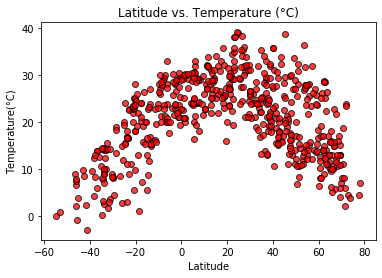

In [23]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Temperate (°C)"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature (°C)")
plt.ylabel("Temperature(°C)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

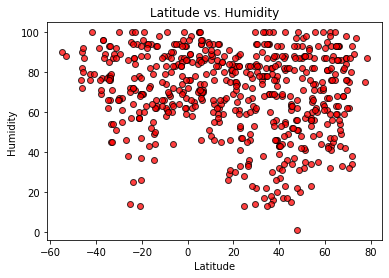

In [24]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

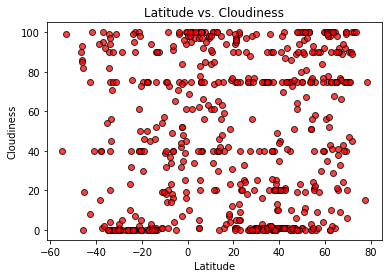

In [25]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'windspeed')

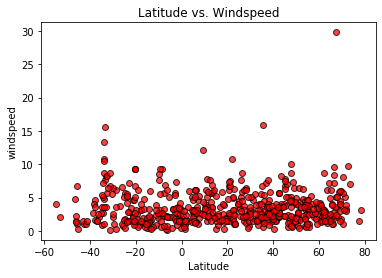

In [26]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["windspeed"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Windspeed")
plt.ylabel("windspeed")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [28]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hem_weather = weather_data_df.loc[weather_data_df["Latitude"] > 0]

Southern_Hem_weather= weather_data_df.loc[weather_data_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Max. Temperature vs Latitude')

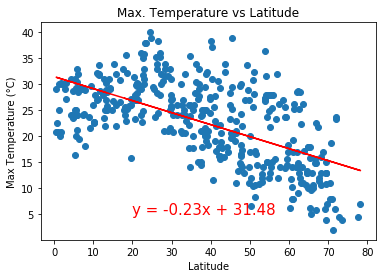

In [31]:
#define x and y axis
Nor_max_temp= Northern_Hem_weather["Max Temp(°C)"]
Nor_Lat=Northern_Hem_weather["Latitude"]

#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_max_temp)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_max_temp)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title(" Northern Hemi: Max. Temperature vs Latitude")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Southern Hemi : Max. Temperature vs Latitude')

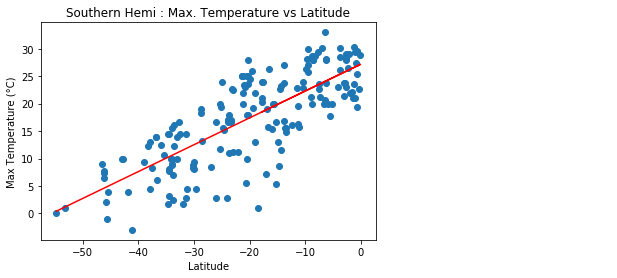

In [34]:
#define x and y axis
Sou_max_temp= Southern_Hem_weather["Max Temp(°C)"]
Sou_Lat=Southern_Hem_weather["Latitude"]

#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sou_Lat, Sou_max_temp)
regress_values = Sou_Lat * slope + intercept

#plot
plt.scatter(Sou_Lat, Sou_max_temp)

#add lineregression 
plt.plot(Sou_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Southern Hemi : Max. Temperature vs Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, ' Northern Hemi: Humidity vs Latitude')

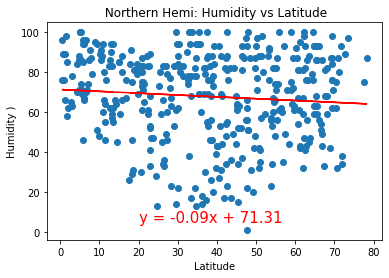

In [39]:
#define x and y axis
Nor_humidity= Northern_Hem_weather["Humidity"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_humidity)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_humidity)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(" Northern Hemi: Humidity vs Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(0.5, 1.0, ' Southern Hemi: Humidity vs Latitude')

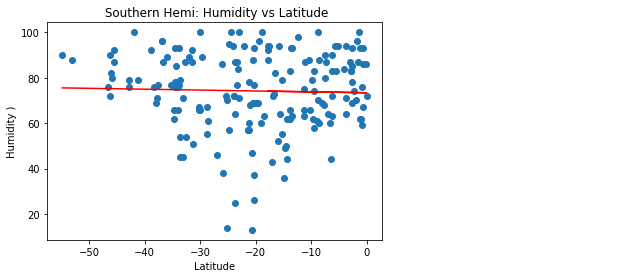

In [38]:
#define x and y axis
Sou_humidity= Southern_Hem_weather["Humidity"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sou_Lat, Sou_humidity)
regress_values = Sou_Lat * slope + intercept

#plot
plt.scatter(Sou_Lat, Sou_humidity)

#add lineregression 
plt.plot(Sou_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(" Southern Hemi: Humidity vs Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, ' Northern Hemi: Cloudiness vs Latitude')

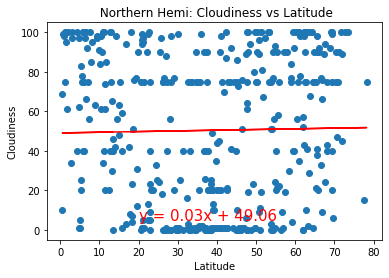

In [40]:
#define x and y axis
Nor_cloud= Northern_Hem_weather["Cloudiness"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_cloud)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_cloud)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(" Northern Hemi: Cloudiness vs Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(0.5, 1.0, ' Southern Hemi: Cloudiness vs Latitude')

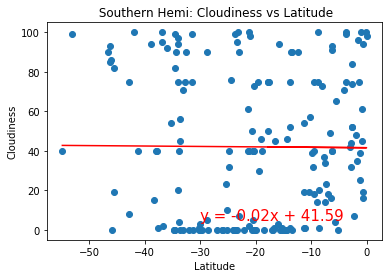

In [55]:
#define x and y axis
Sou_cloud= Southern_Hem_weather["Cloudiness"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sou_Lat, Sou_cloud)
regress_values = Sou_Lat * slope + intercept

#plot
plt.scatter(Sou_Lat, Sou_cloud)

#add lineregression 
plt.plot(Sou_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(" Southern Hemi: Cloudiness vs Latitude")

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

(0, 20)

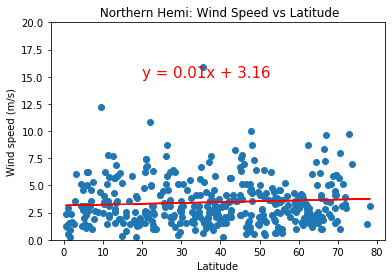

In [54]:
#define x and y axis
Nor_ws= Northern_Hem_weather["windspeed"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_ws)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_ws)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.title(" Northern Hemi: Wind Speed vs Latitude")
plt.ylim(0,20)


####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

(0, 20)

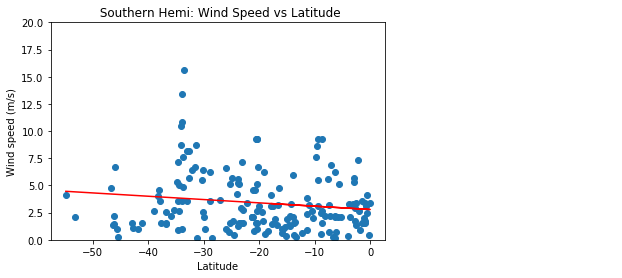

In [57]:
#define x and y axis
Sou_ws= Southern_Hem_weather["windspeed"]


#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Sou_Lat, Sou_ws)
regress_values = Sou_Lat * slope + intercept

#plot
plt.scatter(Sou_Lat, Sou_ws)

#add lineregression 
plt.plot(Sou_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Wind speed (m/s)")
plt.title(" Southern Hemi: Wind Speed vs Latitude")
plt.ylim(0,20)